In [ ]:
import sys
from pathlib import Path
sys.path.append("../utils")
from IPython.display import Markdown, display

In [ ]:
# Clone YOLOv5 repo
if not Path('yolov5').exists():
    !git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15937, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15937 (delta 26), reused 29 (delta 14), pack-reused 15880
Receiving objects: 100% (15937/15937), 14.66 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (10921/10921), done.
/content/yolov5


In [ ]:
print("Convert PyTorch model to OpenVINO Model:")
command_export = f'{"python export.py --weights yolov5s/yolov5s.pt --imgsz 640 --batch-size 1 --include openvino"}'
display(Markdown(f"`{command_export}`"))
! $command_export

Convert PyTorch model to OpenVINO Model:


`python export.py --weights yolov5s/yolov5s.pt --imgsz 640 --batch-size 1 --include openvino`

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.2/613.2 kB 8.4 MB/s eta 0:00:00
export: data=data/coco128.yaml, weights=['yolov5s/yolov5s.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['openvino']
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CPU

100% 14.1M/14.1M [00:00<00:00, 33.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients

PyTorch: starting from yolov5s/yolov5s.pt with output shape (1, 25200, 85) (14.1 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 67.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.2s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or 

In [ ]:
!python detect.py --weights /content/thermal.pt --img-size 640 --source /content/man.jpg  --device cpu

detect: weights=['/content/thermal.pt'], source=/content/man.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
image 1/1 /content/man.jpg: 448x640 1 mens, 194.4ms
Speed: 0.6ms pre-process, 194.4ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


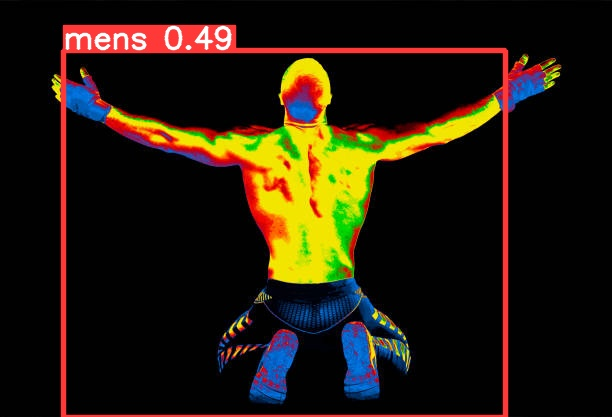

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/yolov5/runs/detect/exp2/man.jpg')

In [ ]:
!python export.py --weights /content/thermal.pt --include openvino

export: data=data/coco128.yaml, weights=['/content/thermal.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['openvino']
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients

PyTorch: starting from /content/thermal.pt with output shape (1, 25200, 6) (13.8 MB)

ONNX: starting export with onnx 1.14.1...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 1.0s, saved as /content/thermal.onnx (27.2 MB)

OpenVINO: starting export with openvino 2023.0.1-11005-fa1c41994f3-releases/2023/0...
OpenV

In [ ]:
!python detect.py --weights /content/thermal_openvino_model --img-size 640 --source /content/man.jpg  --device cpu

detect: weights=['/content/thermal_openvino_model'], source=/content/man.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-213-g378ed74 Python-3.10.12 torch-2.0.1+cu118 CPU

Loading /content/thermal_openvino_model for OpenVINO inference...
image 1/1 /content/man.jpg: 640x640 1 mens, 156.7ms
Speed: 3.1ms pre-process, 156.7ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


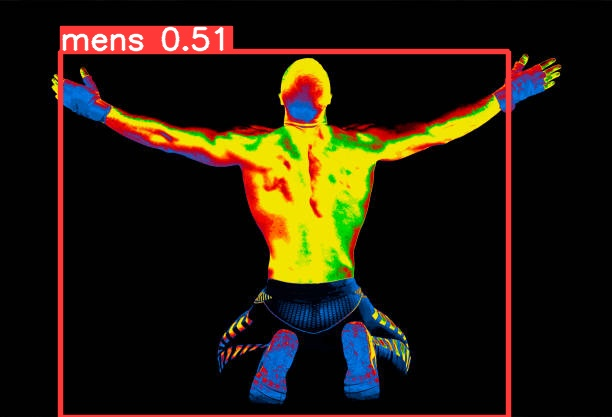

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/yolov5/runs/detect/exp3/man.jpg')

In [ ]:
# Inference FP32 model (OpenVINO IR)
!benchmark_app -m /content/thermal.onnx -d CPU -api async

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 53.44 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     images (node: images) : f32 / [...] / [1,3,640,640]
[ INFO ] Model outputs:
[ INFO ]     output0 (node: output0) : f32 / [...] / [1,25200,6]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch size: 1
[Step 6/11] Confi

In [ ]:
# Inference INT8 model (OpenVINO IR)
!benchmark_app -m /content/thermal_openvino_model/thermal.xml -d CPU -api async

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 13.43 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     images (node: images) : f32 / [...] / [1,3,640,640]
[ INFO ] Model outputs:
[ INFO ]     output0 (node: output0) : f32 / [...] / [1,25200,6]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch size: 1
[Step 6/11] Confi